**Câu 2: Xây dựng mô hình phân loại (categorization) bài báo sử dụng các phương pháp học máy khác nhau. Đo độ chính xác của các mô hình này.**

In [ ]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

from gensim.models import word2vec, FastText
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
import string
from nltk.stem import WordNetLemmatizer


import gensim
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
# importing data
df = pd.read_csv('/content/drive/MyDrive/NLP Midterm/data.csv',encoding='utf-8')
print(df.shape)

(51999, 3)


In [ ]:
# head of the data
print(df.head(5))

                                               title   category  \
0        Galaxy Gear có thể điều khiển TV thông minh  Công nghệ   
1  Nhật – Mỹ định hội đàm chớp nhoáng tại Singapo...   Thế giới   
2         Hàng ngàn học sinh miền núi Nghệ An bỏ học   Giáo dục   
3          'Cô ấy bỏ em vì... em gái trượt đại học?'   Đời sống   
4  Cậu bé vượt qua Face ID của iPhone ngang anh Q...  Công nghệ   

                                             content  
0  Mẫu đồng hồ thông minh Galaxy Gear của Samsung...  
1  >> Phó Tổng thống Mỹ công du châu Á, bàn về Bi...  
2  Hàng ngàn học sinh sau khi tốt nghiệp THCS đã ...  
3  Mr Búp Bê (BB): Hay là bạn phải đến kèm cho cô...  
4  Trang Wired mới đây đưa thông tin cậu bé Ammar...  


category
Công nghệ    4000
Giáo dục     4000
Giải trí     4000
Khoa học     3999
Kinh tế      4000
Nhà đất      4000
Pháp luật    4000
Thế giới     4000
Thể thao     4000
Văn hóa      4000
Xe cộ        4000
Xã hội       4000
Đời sống     4000
dtype: int64


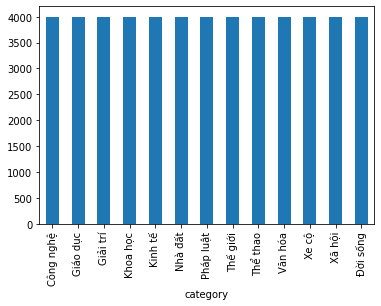

In [ ]:
#Kiểm tra xem category đã cân bằng chưa
print(df.groupby('category').size())

# Plotting the bar chart
%matplotlib inline
df.groupby('category').size().plot(kind='bar');

In [ ]:
# X = df.loc[:,['title','content']]
# print(X)
# y = df.loc[:,['category']]
# print(y)
# .values

In [ ]:
#Import Vietnamese stopwords
f = open('/content/drive/MyDrive/NLP Midterm/stop_word_vietnamese.txt', 'r', encoding='UTF-8')

with open('/content/drive/MyDrive/NLP Midterm/stop_word_vietnamese.txt', 'r') as f:
    stopwords = [s.strip() for s in f.readlines()]
    print(stopwords)

['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ', 'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng', 'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rằng', 'rất', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa']


**Text Preprocessing**

In [ ]:
#hàm xử lý stopwords
stop = set(stopwords)

def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop]
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text



In [ ]:
#Xóa link
df["clean_text_content"] = df["content"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))

#Xóa các ký tự đặc biệt
df["clean_text_content"] = df["clean_text_content"].apply(lambda s: ' '.join(re.sub(r'[>>().,!?:;-=..."@#_]', '', s).split()))

#Xóa các number
df["clean_text_content"].replace('d+', '', regex=True, inplace=True)

#Xử lý stopword
df["clean_text_content"] = df["clean_text_content"].apply(lambda s: rem_en(s))


df["clean_text_category"] = df["category"].apply(lambda s: rem_en(s))

# df[['content', 'category','clean_text_content', 'clean_text_category']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51999 entries, 0 to 51998
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                51999 non-null  object
 1   category             51999 non-null  object
 2   content              51999 non-null  object
 3   clean_text_content   51999 non-null  object
 4   clean_text_category  51999 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [ ]:
df

,title,category,content,clean_text_content,clean_text_category
0,Galaxy Gear có thể điều khiển TV thông minh,Công nghệ,Mẫu đồng hồ thông minh Galaxy Gear của Samsung...,mẫu đồng hồ thông minh galaxy gear samsung - ả...,công nghệ
1,Nhật – Mỹ định hội đàm chớp nhoáng tại Singapo...,Thế giới,">> Phó Tổng thống Mỹ công du châu Á, bàn về Bi...",phó tổng thống mỹ công u châu á bàn về biển đô...,thế giới
2,Hàng ngàn học sinh miền núi Nghệ An bỏ học,Giáo dục,Hàng ngàn học sinh sau khi tốt nghiệp THCS đã ...,hàng ngàn học sinh tốt nghiệp thcs ự thi thpt ...,giáo dục
3,'Cô ấy bỏ em vì... em gái trượt đại học?',Đời sống,Mr Búp Bê (BB): Hay là bạn phải đến kèm cho cô...,mr búp bê bb hay bạn đến kèm cô em học nhỉ chắ...,đời sống
4,Cậu bé vượt qua Face ID của iPhone ngang anh Q...,Công nghệ,Trang Wired mới đây đưa thông tin cậu bé Ammar...,trang wire mới đưa thông tin cậu bé ammar mali...,công nghệ
...,...,...,...,...,...
51994,Toàn cảnh tìm thấy hài cốt được cho là 2 phi c...,Khoa học,VIỆT AN.\n,việt an,khoa học
51995,Chú gấu túi may mắn sống sót sau hành trình 16...,Khoa học,Chú gấu túi bị kẹt trong bánh xe ô tô. (Nguồn:...,chú gấu túi kẹt trong bánh xe ô tô nguồn jane ...,khoa học
51996,"Bị cá mập trắng tấn công, dùng chổi đánh lại t...",Khoa học,Video đập chổi vào đầu cá mập trắng khổng lồ.\...,vieo đập chổi đầu cá mập trắng khổng lồ mới tờ...,khoa học
51997,Phát hiện những hình vẽ bí ẩn trên sa mạc ở Tr...,Khoa học,Máy ảnh của vệ tinh đã chụp được những bức hìn...,máy ảnh vệ tinh chụp bức hình giống bánh xe vẽ...,khoa học


**tokenization**

In [ ]:
df['clean_text_content'] = df['clean_text_content'].apply(gensim.utils.simple_preprocess)
df

,title,category,content,clean_text_content,clean_text_category
0,Galaxy Gear có thể điều khiển TV thông minh,Công nghệ,Mẫu đồng hồ thông minh Galaxy Gear của Samsung...,"[mẫu, đồng, hồ, thông, minh, galaxy, gear, sam...",công nghệ
1,Nhật – Mỹ định hội đàm chớp nhoáng tại Singapo...,Thế giới,">> Phó Tổng thống Mỹ công du châu Á, bàn về Bi...","[phó, tổng, thống, mỹ, công, châu, bàn, về, bi...",thế giới
2,Hàng ngàn học sinh miền núi Nghệ An bỏ học,Giáo dục,Hàng ngàn học sinh sau khi tốt nghiệp THCS đã ...,"[hàng, ngàn, học, sinh, tốt, nghiệp, thcs, thi...",giáo dục
3,'Cô ấy bỏ em vì... em gái trượt đại học?',Đời sống,Mr Búp Bê (BB): Hay là bạn phải đến kèm cho cô...,"[mr, búp, bê, bb, hay, bạn, đến, kèm, cô, em, ...",đời sống
4,Cậu bé vượt qua Face ID của iPhone ngang anh Q...,Công nghệ,Trang Wired mới đây đưa thông tin cậu bé Ammar...,"[trang, wire, mới, đưa, thông, tin, cậu, bé, a...",công nghệ
...,...,...,...,...,...
51994,Toàn cảnh tìm thấy hài cốt được cho là 2 phi c...,Khoa học,VIỆT AN.\n,"[việt, an]",khoa học
51995,Chú gấu túi may mắn sống sót sau hành trình 16...,Khoa học,Chú gấu túi bị kẹt trong bánh xe ô tô. (Nguồn:...,"[chú, gấu, túi, kẹt, trong, bánh, xe, tô, nguồ...",khoa học
51996,"Bị cá mập trắng tấn công, dùng chổi đánh lại t...",Khoa học,Video đập chổi vào đầu cá mập trắng khổng lồ.\...,"[vieo, đập, chổi, đầu, cá, mập, trắng, khổng, ...",khoa học
51997,Phát hiện những hình vẽ bí ẩn trên sa mạc ở Tr...,Khoa học,Máy ảnh của vệ tinh đã chụp được những bức hìn...,"[máy, ảnh, vệ, tinh, chụp, bức, hình, giống, b...",khoa học


**Biểu diễn văn bản**

**One-hot**

One-hot encoding là quá trình biến đổi từng giá trị thành các đặc trưng nhị phân chỉ chứa giá trị 1 hoặc 0. Mỗi mẫu trong đặc trưng phân loại sẽ được biến đổi thành một vector có kích thước m chỉ với một trong các giá trị là 1

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# transform and map pokemon generations
X = df['clean_text_content'].astype('str')

# integer encode
label_encoder  = LabelEncoder()
integer_encoded = label_encoder.fit_transform(X)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

X = onehot_encoded
print(X.shape)

[20890 30050 13764 ... 43799 20384  7663]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(51999, 51562)


**TF-IDF**

+tf-idf là trọng số của một từ trong văn bản thu được qua thống kê thể hiện mức độ quan trọng của từ này trong một văn bản, mà bản thân văn bản đang xét nằm trong một tập hợp các văn bản.

+Thuật toán này thường được sử dụng vì: trong ngôn ngữ luôn có những từ xảy ra thường xuyên với các từ khác.

+Luôn có một tập các từ mà tần số xuất hiện, sử dụng nhiều hơn các từ khác, điều này đúng trong bất kì ngôn ngữ nào. Chính vì vậy ta cần có một phương pháp để làm việc cân bằng mức độ quan trọng giữa các từ.



In [ ]:
#Creating the features (tf-idf weights) for the processed text

X = df['clean_text_content'].astype('str')

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),
                                   min_df = 2,
                                   max_df = .95)

X = tfidf_vectorizer.fit_transform(X) #features
y = df['clean_text_category'].values #target

print (X.shape)
print(y.shape)

(51999, 1051690)
(51999,)


**Lấy 100 features tốt nhất để huấn luyện**

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=100,
                   n_iter=10,
                   random_state=3)

X = lsa.fit_transform(X)
X.shape

(51999, 100)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

**Chia tập dữ liệu thành tập Train và Test**

In [ ]:
# Train test split with stratified sampling for evaluation
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .3,
                                                    shuffle = True,
                                                    stratify = y,
                                                    random_state = 3)


**Khởi tạo các model phân loại cần thiết**

+Decsision Tree

+SVM

+Naive Bayes

+Logistic Regression


In [ ]:
#Creating a dict of the models
model_dict = {
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'SVM': svm.SVC(kernel='linear', C=1,gamma=0),
              'Gaussian Naive Bayes': GaussianNB(),
              'Logistic Regression' :LogisticRegression()

              }

**Hàm dùng để tính score cho từng model**

In [ ]:
#Function to get the scores for each model in a df
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

def model_score_df(model_dict):
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df

In [ ]:
model_score_df(model_dict)

,model_name,accuracy_score,precision_score,recall_score,f1_score
3,Logistic Regression,0.813013,0.814075,0.813013,0.813051
1,SVM,0.811154,0.81338,0.811154,0.811517
2,Gaussian Naive Bayes,0.713974,0.721591,0.713974,0.713765
0,Decsision Tree,0.678782,0.679289,0.678782,0.678964
